**Описание проекта**

Целью проекта является выявление закономерностей, определяющих успешность компьютерных игр на основе исторических данных о продажах, оценках пользователей и критиков, а также жанрах и платформах. Эти знания позволят интернет-магазину «Стримчик» прогнозировать потенциально успешные игры и планировать рекламные кампании на 2017 год.

**Цель исследования**

Основная цель исследования — анализировать данные продаж игр по всему миру и выявить факторы, которые влияют на их успешность. В частности, важно определить, какие платформы и жанры наиболее перспективны для планирования будущих продаж, а также оценить влияние оценок пользователей и критиков на популярность игр. Анализ будет сосредоточен на данных до 2016 года, чтобы сделать прогнозы на 2017 год.

**Ход исследования**

**1. [Изучение данных:](#Изучение)**
- Открытие и первичный анализ данных, содержащихся в файле games.csv.
- Оценка структуры данных и предварительная обработка для устранения ошибок и заполнения пропусков.

**2. [Подготовка данных:](#Подготовка)**
- Приведение названий столбцов к нижнему регистру для удобства работы с данными.
- Преобразование типов данных в столбцах для корректной работы с числами и датами.
- Обработка пропусков в данных, в том числе работа с аббревиатурой tbd в оценках пользователей.
- Расчёт суммарных продаж по регионам (Северная Америка, Европа, Япония и другие).

**3. [Исследовательский анализ данных:](#Исследовательский)**
- Анализ количества игр, выпущенных по годам, для определения актуальных временных периодов.
- Изучение динамики продаж по различным платформам, выделение платформ с наибольшими продажами.
- Оценка жизненного цикла платформ (появление и исчезновение), выбор наиболее перспективных платформ для анализа.
- Построение графика распределения глобальных продаж игр по платформам с использованием "ящика с усами" для оценки разброса данных.
- Анализ влияния оценок критиков и пользователей на продажи внутри популярных платформ с использованием диаграммы рассеяния и расчёта корреляции.
- Исследование распределения продаж игр по жанрам для выявления наиболее прибыльных и популярных жанров.

**4. [Портрет пользователя по регионам:](#Портрет)**
- Определение топ-5 популярных платформ в разных регионах (Северная Америка, Европа, Япония).
- Анализ самых популярных жанров в каждом регионе, сравнение предпочтений пользователей.
- Исследование влияния возрастных рейтингов ESRB на продажи в каждом из регионов.

**5. [Проверка гипотез:](#[Проверка)**
- Проверка гипотезы о том, что средние пользовательские рейтинги игр на платформах Xbox One и PC не различаются.
- Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports различны.
- Для проверки гипотез используются соответствующие статистические критерии (например, критерий Стьюдента).

**6. [Общий вывод:](#Общий)**
- На основе анализа данных будут сформулированы выводы о факторах, определяющих успешность игр.

**7. [Рекомендации для бизнеса:](#Рекомендации)**
-  Будут даны рекомендации по планированию рекламных кампаний для игр в 2017 году.

**Описание данных** 
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id='изучение'></a>
## Изучение данных:

In [1]:
# Загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Чтение CSV-файла с данными о продажах игр
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Функция для вывода общей информации о DataFrame
def analyze_dataframe(df):
    # Вывод первых 5 строк
    print("Первые 5 строк:")
    display(df.head())
    
    # Вывод общей информации о данных
    print("\nОбщая информация о DataFrame:\n")
    df.info()
    
    # Описание числовых данных
    print("\nСтатистическое описание:")
    display(df.describe())
    
    # Количество дубликатов
    duplicates = df.duplicated().sum()
    print(f"\nКоличество дубликатов: {duplicates}")
    
    # Проверка на пропуски в данных
    print("\nПропуски в каждом столбце:")
    display(df.isnull().sum())

analyze_dataframe(df)

Первые 5 строк:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Статистическое описание:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Количество дубликатов: 0

Пропуски в каждом столбце:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Пропуски в данных:**

- Колонки `Name` и `Genre` содержат по 2 пропущенных значения, что можно исправить удалением этих строк, так как их малое количество несущественно.
- В колонке `Year_of_Release` 269 пропусков — можно либо удалить строки с пропусками, либо заполнить их числовой заглушкой, но это потребует фильтрации при дальнейших расчетах.
- В колонке `Rating` пропуски могут быть важными для анализа, поэтому их стоит заменить на заглушку, например, "Unknown".
- Пропуски в колонках `Critic_Score` и `User_Score` требуют особого подхода, так как в них пропущено много значений (8578 и 6701). Возможно, стоит заполнить медианными значениями или рассмотреть другие варианты обработки.

**Приведение данных в порядок:**

- Названия стоблцов разных регистрах.
- Столбец `Year_of_Release` должен иметь тип `int`, а не `float`.
- Столбец `User_Score` имеет тип `object`, но должен быть числовым. Возможно, присутствуют некорректные значения, такие как `'tbd'`.
- Явных дубликатов нет, но надо проверить неявные дубликаты в `Name`, `Year_of_Release` и `'platform'`.

<a id='Подготовка'></a>
## Подготовка данных

In [4]:
# Вывод всех столбцов в таблице
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# Создание словаря для переименования столбцов DataFrame
columns = {
    'Name': 'name', 
    'Platform': 'platform', 
    'Year_of_Release': 'year_of_release', 
    'Genre': 'genre', 
    'NA_sales': 'na_sales', 
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales', 
    'Other_sales': 'other_sales', 
    'Critic_Score': 'critic_score', 
    'User_Score': 'user_score', 
    'Rating': 'rating'
}

# Переименование столбцов DataFrame в соответствии со словарём columns
df = df.rename(columns=columns)

# Проверка изменения столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Преобразуем столбец year_of_release в целочисленный формат
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [7]:
# Проверяем на аномалии значения столбца user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец `user_score`:
- Этот столбец должен содержать числовые значения, но представлен как object, вероятно из-за строковых значений 'tbd' (to be determined).
- Решение: сначала заменим 'tbd' на NaN, затем преобразуем данные в тип float64.

In [8]:
# Заменяем 'tbd' в user_score на NaN и преобразуем в float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [9]:
def missing_values(df):
    missing_data = df.isnull().sum()  # Количество пропусков в каждом столбце
    total_entries = len(df)  # Общее количество строк в DataFrame
    missing_percentage = (missing_data / total_entries) * 100  # Процент пропусков
    return pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Проверка пропусков в данных
missing_values(df)

,Missing Values,Percentage
name,2,0.011965
platform,0,0.000000
year_of_release,269,1.609333
genre,2,0.011965
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,51.319174
user_score,9125,54.591684


In [10]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


In [11]:
# Удаляем строки с пропусками в критически важных столбцах
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

# Замена пропусков в столбце rating на "unknown"
df['rating'] = df['rating'].fillna('unknown')

# Проверка пропусков в данных
missing_values(df)

,Missing Values,Percentage
name,0,0.000000
platform,0,0.000000
year_of_release,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8461,51.453418
user_score,8981,54.615665


При изучении данных, явных дубликатов не было обнаружено. Следует проверить неявные дубликаты в столбцах `'name'`, `'platform'`, `'year_of_release'`.

In [12]:
# Проверка на неявные дубликаты
potential_duplicates = df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

# Вывод результатов проверки на неявные дубликаты
print(f"Найдено потенциальных неявных дубликатов: {len(potential_duplicates)}")

# Отображение примеров неявных дубликатов для анализа
if len(potential_duplicates) > 0:
    print(potential_duplicates.head())

Найдено потенциальных неявных дубликатов: 2
                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23          83.0         5.5      E  
16230       0.0         0.00          83.0         5.5      E  


- Одинаковые значения в ключевых столбцах: `name`, `platform`, и `year_of_release` одинаковы для обеих строк.
- Отличаются значения в продажах: одна строка имеет больше продаж (на рынке Северной Америки и других регионах), а другая строка имеет почти нулевые продажи.

Выполним агрегирование данных: Поскольку это одинаковая игра на той же платформе в тот же год, можно объединить строки, суммируя продажи по регионам (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`) и сохраняя остальные характеристики (например, `critic_score`, `user_score`, и `rating`).

In [13]:
# Группировка и суммирование продаж по одинаковым играм
df = df.groupby(['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating'], as_index=False).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
})

In [14]:
# Создаём новый столбец с суммарными продажами
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# Выводим первые пять строк df
df.head()

,name,platform,year_of_release,genre,critic_score,user_score,rating,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Tales of Xillia 2,PS3,2012,Role-Playing,71.0,7.9,T,0.20,0.12,0.45,0.07,0.84
1,.hack//Infection Part 1,PS2,2002,Role-Playing,75.0,8.5,T,0.49,0.38,0.26,0.13,1.26
2,.hack//Mutation Part 2,PS2,2002,Role-Playing,76.0,8.9,T,0.23,0.18,0.20,0.06,0.67
3,.hack//Outbreak Part 3,PS2,2002,Role-Playing,70.0,8.7,T,0.14,0.11,0.17,0.04,0.46
4,007 Racing,PS,2000,Racing,51.0,4.6,T,0.30,0.20,0.00,0.03,0.53


В ходе подготовки данных мы выполнили следующие шаги:

- Обработка пропусков: Были проанализированы и удалены пропуски в ключевых столбцах, таких как `year_of_release`, `genre`, `name`. Пропуски в`rating` были заменены на заглушки `NaN` и `unknown`.
- Преобразование типов данных: Столбец `user_score` был преобразован в float, a `year_of_release` в int.
- Проверка и анализ неявных дубликатов: Была проведена проверка на основе ключевых полей `name`, `platform`, `year_of_release` и было выявлено несколько потенциальных неявных дубликатов. Эти строки, хотя и имеют одинаковые значения по указанным столбцам, отличаются в некоторых других показателях, таких как продажи в различных регионах. Я сохранила эти строки для дальнейшего анализа, так как различия в показателях могут быть результатом различий в сборах данных по продажам, а не ошибками дублирования.
- Приведение столбцов к единому формату: Для унификации и удобства работы с данными были приведены названия столбцов к нижнему регистру, что упрощает дальнейшие манипуляции с DataFrame.

<a id='Исследовательский'></a>
## Исследовательский анализ данных

In [15]:
# Группируем данные по году выпуска и считаем количество игр в каждом году
games_per_year = df.groupby('year_of_release')['name'].count()

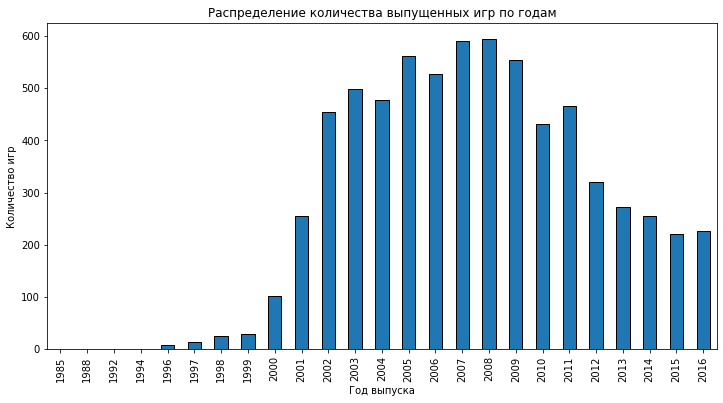

In [16]:
# Построение столбчатой диаграммы для количества выпущенных игр по годам (дискретные значения)
games_per_year.plot(kind='bar', figsize=(12, 6), edgecolor='black')

# Добавление названий осей и заголовка
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

# Показать график
plt.show()

**Анализ количества выпущенных игр по годам показывает следующие тенденции:**

- В ранние годы, с середины 1990-х, количество выпускаемых игр было небольшим — менее 50 игр в год.
- С середины 200-х до 2003 года наблюдается значительный рост количества игр, дойдя до 500 в годю
- Затем наблюдается небольшие флуктуации с увеличением (2003, 2005) и падением (2004, 2006) в районе 500.
- Самые высокие пришлись на 2007 и 2008 годах, чуть менее 600 игр ежегодно.
- После 2009 года количество выпущенных игр постепенно начинает снижаться: с 2010 по 2016 год видим устойчивое падение.

Данные за все периоды не равнозначны. Для анализа текущих тенденций и построения прогноза лучше сосредоточиться на периоде с 2000 года, так как в этот период рынок видеоигр сформировался, и появились современные платформы.

In [17]:
# Группируем данные по платформам и считаем суммарные продажи для каждой платформы
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10)

platform
PS2     946.01
X360    853.67
PS3     785.44
Wii     659.23
DS      382.88
PS4     244.27
XB      212.22
PS      209.98
PC      189.85
PSP     187.68
Name: total_sales, dtype: float64

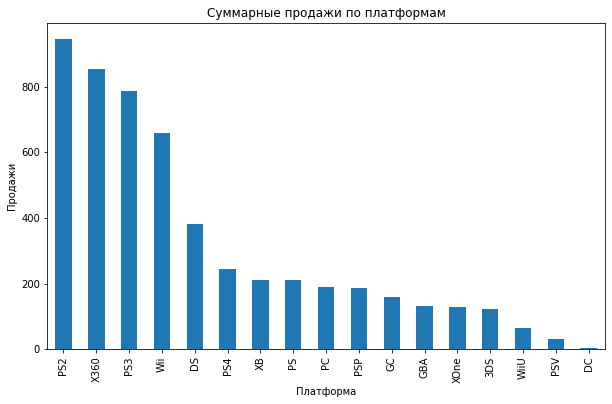

In [18]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar')
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Явно выделяются 4 лидера по сумме продаж: `PS2`, `X360`, `PS3`, `Wii`,  но оставим 5.

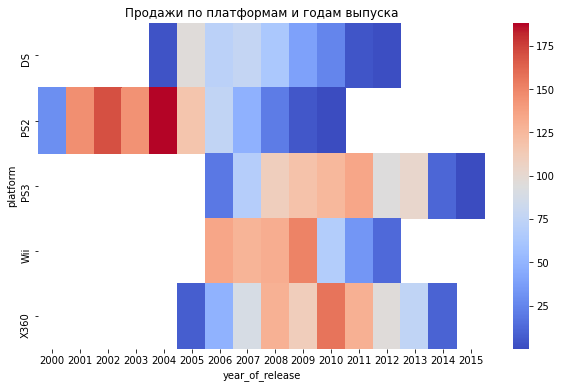

In [19]:
# Фильтруем данные, начиная с 2000 года
df = df[df['year_of_release'] >= 2000]

# Выбираем топ-6 платформ
top_platforms_sales = platform_sales.head(5).index

# Фильтруем данные только для топ-5 платформ
top_platform_sales = df[df['platform'].isin(top_platforms_sales)]

# Группируем данные по платформам и годам выпуска и считаем суммарные продажи для каждой комбинации
platform_sales_per_year = top_platform_sales.pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum',
)

# Строим тепловую карту с заголовком на русском
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.heatmap(platform_sales_per_year, cmap="coolwarm")
plt.title("Продажи по платформам и годам выпуска")
plt.show()

**Анализ тепловой карты продаж по платформам и годам**

Тепловая карта предоставляет визуально оценить, как менялись продажи разных игровых платформ с течением времени. По представленной карте можно сделать следующие выводы:

**PS2 и PS3:**

- Постепенный переход: На тепловой карте наблюдается постепенный переход от PS2 к PS3. Пик продаж PS2 в 2004 году и последующее снижение совпадают с началом роста продаж PS3. Такой плавный переход может быть объяснен несколькими факторами:
- Совместное существование: Оба поколения консолей сосуществовали на рынке в течение нескольких лет, предоставляя игрокам выбор.
- Каталог игр: Многие разработчики продолжали выпускать игры для PS2 даже после выхода PS3, поддерживая интерес к этой платформе.
- Цена: Снижение цены на PS2 делало ее более доступной для широкой аудитории.

**DS:**

- Стабильная популярность: DS продемонстрировала стабильные продажи на протяжении своего жизненного цикла, особенно в сравнении с другими платформами. Это может быть связано с уникальной концепцией двух экранов и ориентированностью на казуальные игры.
- Ранний выход на рынок: DS вышла на рынок раньше, чем PS3 и Xbox 360, и успела завоевать свою аудиторию.

**Wii:**

- Яркий дебют и быстрый спад: Wii отличилась уникальным дизайном и инновационными контроллерами, что обеспечило ей быстрый рост популярности по сравнению с Xbox 360, который более плавно набрал популярность. Однако, длительность ее жизненного цикла оказалась короче, чем у конкурентов.

**X360:**

- Рост и спад: Xbox 360 показала типичный жизненный цикл консоли: быстрый рост продаж после запуска, пик и последующее снижение. Это связано с насыщением рынка и появлением нового поколения консолей.

**Дополнительные наблюдения:**
- Цикличность: Видно, что у каждой платформы есть свой жизненный цикл: период роста, пик продаж и последующий спад.
- Конкуренция: Платформы конкурируют друг с другом за долю рынка. Например, рост популярности Wii в середине 2000-х годов сопровождался снижением продаж PS2.
- Смена поколений: Смена поколений игровых консолей видна по смене лидеров на рынке.

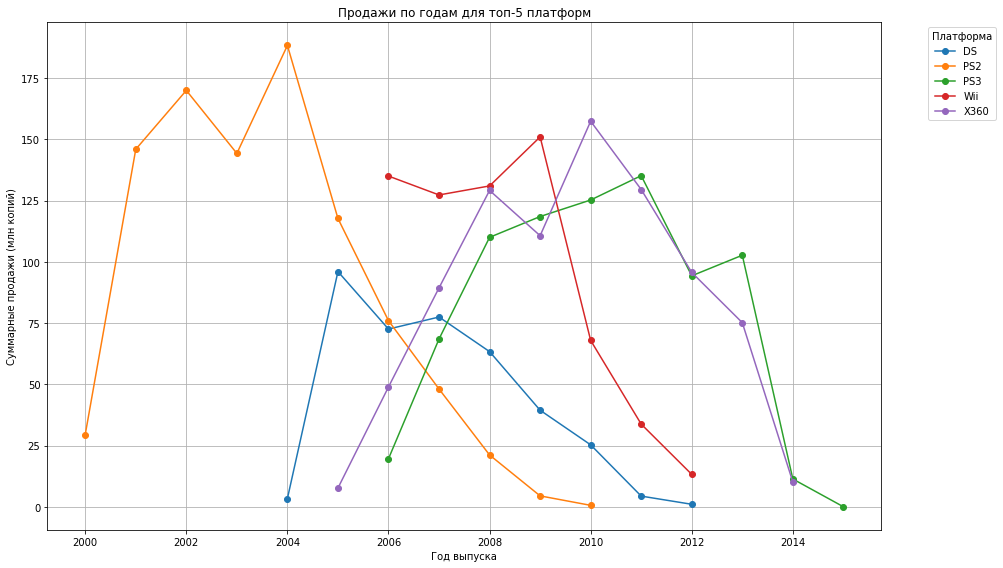

In [20]:
# Строим линейный график для топ-5 платформ
plt.figure(figsize=(14, 8))
for platform in platform_sales_per_year.index:
    plt.plot(platform_sales_per_year.columns, platform_sales_per_year.loc[platform], marker='o', label=platform)

# Настройка заголовков и подписей
plt.title('Продажи по годам для топ-5 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

**Визуально мы можем увидеть по линейному графику жизненный цикл для каждой платформы из топ-5 с 2000 года.**

Лидеры продаж: На протяжении всего периода лидерами продаж были PS2 и PS3. Они демонстрировали наиболее высокие показатели и длительный период активных продаж. X360 запустился годом раньше PS3, но также показал схожий стабильный рост, как и PS2, с более высокими пиками в 2008 и 2010, завершив продажи в 2014. Рост и спад:
Рост: В начале периода наблюдался стремительный рост продаж Wii с 2006, который несколько позже показал стремительное снижение продаж и завершение в 2012. DS после запуска в 2004 набрал свой пик продаж в 2005, но затем показал стабильное сниженое по всему периоду до 2012, звершив свои продажи.
Спад: После достижения пика продажи всех платформ начали снижаться. Это типичный жизненный цикл игровых консолей, связанный с выходом новых поколений и изменением предпочтений геймеров.

In [21]:
# Определяем первый и последний год с ненулевыми данными для каждой платформы
def get_first_year(row):
    return row.index[row.notna()].min() if not row.dropna().empty else None

def get_last_year(row):
    return row.index[row.notna()].max() if not row.dropna().empty else None

start_years = platform_sales_per_year.apply(get_first_year, axis=1)
end_years = platform_sales_per_year.apply(get_last_year, axis=1)

# Создаем DataFrame для анализа жизненного цикла платформ
platform_life_cycle = pd.DataFrame({
    'Start_Year': start_years,
    'End_Year': end_years,
    'Duration': end_years - start_years
})

# Вывод результатов
platform_life_cycle

,Start_Year,End_Year,Duration
platform,,,
DS,2004,2012,8
PS2,2000,2010,10
PS3,2006,2015,9
Wii,2006,2012,6
X360,2005,2014,9


**Выводы**
- Продолжительность жизненного цикла: Большинство платформ имеют жизненный цикл от 6 до 10 лет. Это показывает, что платформы остаются на рынке достаточно долго, прежде чем начинают терять популярность.
- Период активных лет: Платформы, такие как `PS2`, `PS3` и `X360` имеют схожий период активности (9–10 лет), что может указывать на совместимость их жизненных циклов с общими трендами в игровой индустрии. `Wii`, с более коротким циклом в 6 лет, и `DS`, с циклом в 8 лет, демонстрируют более ограниченный период активности, возможно, из-за появления новых, более мощных платформ.

**Рассмотрим последние три года для прогнозироания продаж на следущий 2017 год.**

In [22]:
# Фильтрация данных по периодам с 2014 по 2016 года
filtered_df = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

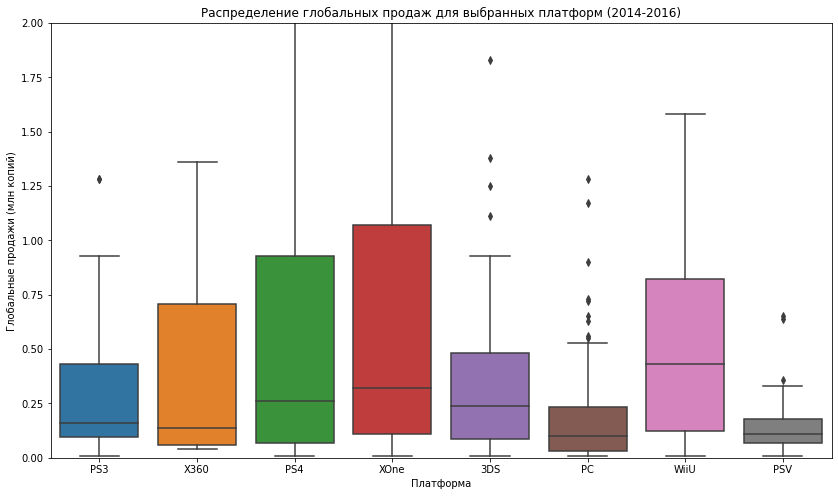

In [23]:
# Построение графика «ящик с усами» в разбивке по платформам
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_df)

# Устанавливаем лимит для оси Y, чтобы убрать влияние больших выбросов
plt.ylim(0, 2)  # Пределы до 3 млн копий

# Настройка заголовков и подписей
plt.title('Распределение глобальных продаж для выбранных платформ (2014-2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')

# Показать график
plt.show()

**Визуальный анализ:**

- Медиана Wii U выше: Несмотря на то, что общее впечатление может создавать, что PS4 и Xbox One более успешны, медиана продаж Wii U оказывается выше. Это означает, что типичная игра на Wii U продавалась лучше, чем типичная игра на PS4 или Xbox One в указанный период.
- Широкий разброс данных: Для большинства платформ наблюдается значительный разброс данных, что указывает на наличие как очень успешных, так и менее успешных игр. Это говорит о высокой конкуренции на рынке и разнообразии предпочтений игроков.
- Выбросы: Наличие выбросов (точек за пределами "усов" ящика) свидетельствует о наличии игр с аномально высокими или низкими продажами. Это могут быть как блокбастеры, так и коммерческие провалы.
- Высокие максимальные значения PS4 и Xbox One: Хотя медиана Wii U выше, максимальные значения продаж для PS4 и Xbox One существенно выше. Это говорит о наличии на этих платформах игр-блокбастеров, которые значительно превосходят по продажам большинство игр на других платформах.
- 3DS и PS3 менее популярны: Платформы 3DS и PS3 демонстрируют более низкие показатели продаж по сравнению с консолями нового поколения (PS4 и Xbox One). Это может быть связано с их ориентацией на другую аудиторию (например, более молодую или предпочитающую портативные игры).
- PC и PSV занимают промежуточное положение: Платформы демонстрируют средние показатели продаж, что указывает на их стабильную позицию на рынке.

**Общие тренды для продаж в 2017 году:**

- Таргетинг на платформы с высокой медианой продаж: Реклама игр для Wii U может привлечь внимание, учитывая их успешные показатели.
- Выделение блокбастеров: Продвижение на PS4 и Xbox One должно акцентироваться на популярных играх, которые уже демонстрируют высокие максимальные продажи.

**Проверка влияния отзывов критиков и пользователей на продажи внутри одной платформы XOne:**

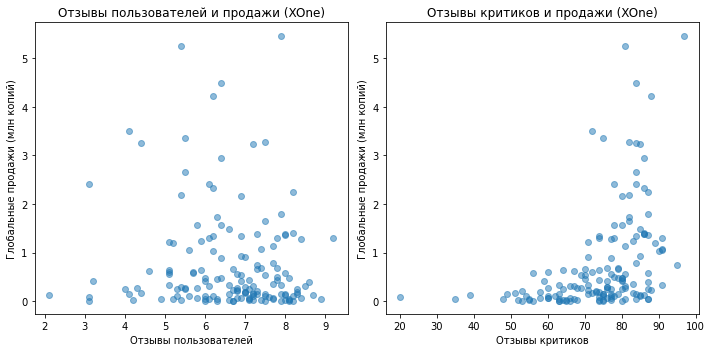

In [24]:
# Выбираем одну популярную платформу - XOne
selected_platforms  = filtered_df[filtered_df['platform'] == 'XOne']

# Проверим наличие данных по отзывам пользователей и критиков
selected_platforms = selected_platforms[['user_score', 'critic_score', 'total_sales']].dropna()

# Строим диаграмму рассеяния для отзывов пользователей и продаж
plt.figure(figsize=(10, 5))

# Диаграмма для отзывов пользователей
plt.subplot(1, 2, 1)
plt.scatter(selected_platforms['user_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('Отзывы пользователей и продажи (XOne)')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

# Диаграмма для отзывов критиков
plt.subplot(1, 2, 2)
plt.scatter(selected_platforms['critic_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('Отзывы критиков и продажи (XOne)')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн копий)')

plt.tight_layout()
plt.show()

**Анализ диаграмм рассеяния:** Отзывы пользователей и критиков vs. Продажи игр на платформе XOne

1. Диаграмма "Отзывы пользователей и продажи":

- Отрицательная корреляция: Точки на графике сильно разбросаны, что свидетельствует о том, что мнение пользователей не является определяющим фактором продаж. Множество игр с высокими оценками пользователей имеют относительно низкие продажи, и наоборот.
- Выбросы: Наблюдаются отдельные игры с очень высокими продажами при средних оценках пользователей. Это может быть связано с сильными маркетинговыми кампаниями, уникальностью игры или другими факторами.

2. Диаграмма "Отзывы критиков и продажи":

- Более выраженная положительная корреляция: Существует более заметная тенденция к увеличению продаж при повышении оценок критиков. Это говорит о том, что мнение профессиональных критиков оказывает большее влияние на продажи игр, чем мнение обычных пользователей.
- Меньше разброса: Точки на графике расположены более компактно, что подтверждает более сильную связь между оценками критиков и продажами. Однако, также присутствуют выбросы, что указывает на то, что и здесь есть исключения из общего правила.

In [25]:
# Считаем корреляцию между отзывами пользователей и продажами для XOne
user_corr_xone= selected_platforms['user_score'].corr(selected_platforms['total_sales'])
critic_corr_xone = selected_platforms['critic_score'].corr(selected_platforms['total_sales'])

print(f"Корреляция между отзывами пользователей и продажами: {user_corr_xone:.2f}")
print(f"Корреляция между отзывами критиков и продажами: {critic_corr_xone:.2f}")

Корреляция между отзывами пользователей и продажами: -0.09
Корреляция между отзывами критиков и продажами: 0.42


**Анализ коэффициентов корреляции**
- Отзывы пользователей: Коэффициент корреляции -0.09 свидетельствует об отрицательной связи между оценками пользователей и продажами. Это подтверждает визуальный анализ диаграммы.
- Отзывы критиков: Коэффициент корреляции 0.42 указывает на умеренную положительную связь между оценками критиков и продажами. Это согласуется с визуальным анализом и говорит о том, что мнение критиков играет более важную роль в формировании продаж, чем мнение пользователей.

**Выводы:**
- Мнение критиков более значимо: Оценки профессиональных критиков оказывают более существенное влияние на продажи игр на платформе XOne по сравнению с оценками пользователей.
- Другие факторы: На продажи игр влияют не только отзывы критиков и пользователей, но и множество других факторов, таких как маркетинговые кампании, жанр игры, эксклюзивность для платформы и т.д.
- Нелинейная зависимость: Зависимость между оценками и продажами может быть нелинейной. Например, может существовать порог, ниже которого низкие оценки существенно влияют на продажи, а выше которого влияние оценок становится менее значимым.

**Проверка влияния отзывов критиков и пользователей на продажи внутри одной платформы PS4:**

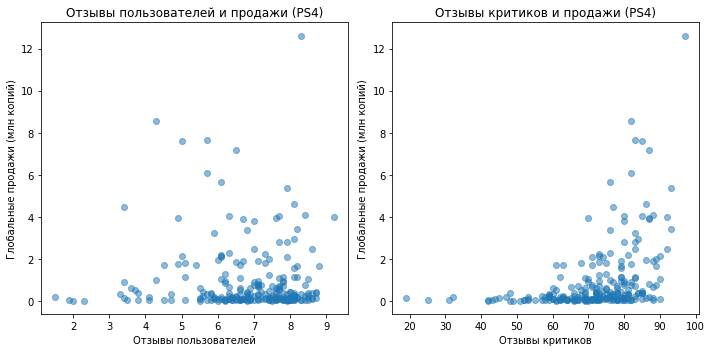

In [26]:
# Выбираем одну популярную платформу - PS4
selected_platforms  = filtered_df[filtered_df['platform'] == 'PS4']

# Проверим наличие данных по отзывам пользователей и критиков
selected_platforms = selected_platforms[['user_score', 'critic_score', 'total_sales']].dropna()

# Строим диаграмму рассеяния для отзывов пользователей и продаж
plt.figure(figsize=(10, 5))

# Диаграмма для отзывов пользователей
plt.subplot(1, 2, 1)
plt.scatter(selected_platforms['user_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('Отзывы пользователей и продажи (PS4)')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

# Диаграмма для отзывов критиков
plt.subplot(1, 2, 2)
plt.scatter(selected_platforms['critic_score'], selected_platforms['total_sales'], alpha=0.5)
plt.title('Отзывы критиков и продажи (PS4)')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн копий)')

plt.tight_layout()
plt.show()

**Анализ диаграмм рассеяния:** Отзывы пользователей и критиков vs. Продажи игр на платформе PS4

1. Диаграмма "Отзывы пользователей и продажи":

- Отрицательная корреляция: Точки на графике сильно разбросаны, что свидетельствует о том, что мнение пользователей не является определяющим фактором продаж. Множество игр с высокими оценками пользователей имеют относительно низкие продажи, и наоборот.
- Выбросы: Наблюдаются отдельные игры с очень высокими продажами при средних оценках пользователей. Это может быть связано с сильными маркетинговыми кампаниями, уникальностью игры или другими факторами.

2. Диаграмма "Отзывы критиков и продажи":

- Более выраженная положительная корреляция: Существует более заметная тенденция к увеличению продаж при повышении оценок критиков. Это говорит о том, что мнение профессиональных критиков оказывает влияние на продажи игр, чем мнение обычных пользователей.
- Меньше разброса: Точки на графике расположены более компактно, что подтверждает более сильную связь между оценками критиков и продажами. Однако, также присутствуют выбросы, что указывает на то, что и здесь есть исключения из общего правила.

In [27]:
# Считаем корреляцию между отзывами пользователей и продажами для PS4
user_corr_ps4= selected_platforms['user_score'].corr(selected_platforms['total_sales'])
critic_corr_ps4 = selected_platforms['critic_score'].corr(selected_platforms['total_sales'])

print(f"Корреляция между отзывами пользователей и продажами: {user_corr_ps4:.2f}")
print(f"Корреляция между отзывами критиков и продажами: {critic_corr_ps4:.2f}")

Корреляция между отзывами пользователей и продажами: -0.04
Корреляция между отзывами критиков и продажами: 0.40


**Анализ коэффициентов корреляции:**
- Отзывы пользователей: Коэффициент корреляции -0.09 свидетельствует об отрицательной связи между оценками пользователей и продажами. Это подтверждает визуальный анализ диаграммы.
- Отзывы критиков: Коэффициент корреляции 0.42 указывает на умеренную положительную связь между оценками критиков и продажами. Это согласуется с визуальным анализом и говорит о том, что мнение критиков играет более важную роль в формировании продаж, чем мнение пользователей.

**Выводы**
- Мнение критиков более значимо: Оценки профессиональных критиков оказывают более существенное влияние на продажи игр на платформе PS4 по сравнению с оценками пользователей.
- Другие факторы: На продажи игр влияют не только отзывы критиков и пользователей, но и множество других факторов, таких как маркетинговые кампании, жанр игры, эксклюзивность для платформы и т.д.
- Нелинейная зависимость: Зависимость между оценками и продажами может быть нелинейной. Например, может существовать порог, ниже которого низкие оценки существенно влияют на продажи, а выше которого влияние оценок становится менее значимым.

**Подсчет суммарных продаж по жанрам c 2014 по 2016:**

In [28]:
# Группируем данные по жанрам и считаем медианные продажи
genre_sales = filtered_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

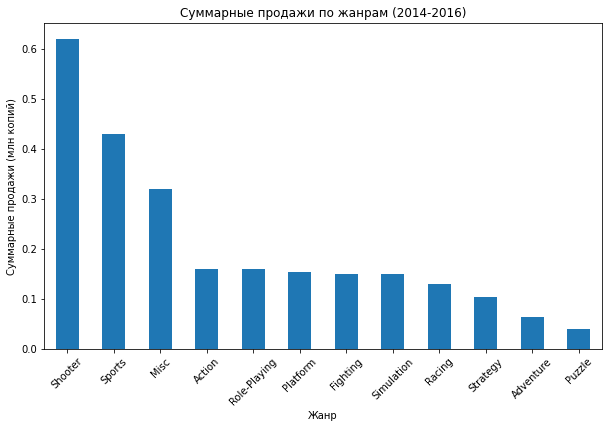

In [29]:
# Столбчатая диаграмма суммарных продаж по жанрам
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Суммарные продажи по жанрам (2014-2016)')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.show()

Ключевые выводы на основе представленной диаграммы:

- Доминирование нескольких жанров: Жанры `"Shooter"`, `"Sports"`, `"Misc"` демонстрируют значительно более высокие продажи по сравнению с другими жанрами. Это может свидетельствовать о том, что эти жанры наиболее востребованы широкой аудиторией или же о наличии в этих категориях крайне успешных игр-блокбастеров.
- Средний уровень продаж: Жанры `Action`, `Role-Playing`, `Platform`, `Fighting`, `'Simulation'` занимают промежуточное положение и демонстрируют относительно стабильные продажи.
- Низкие продажи: Жанры `Racing`, `Strategy`, `Adventure` и `Puzzle` показывают наименьшие объемы продаж. Это может указывать на меньшую популярность этих жанров у массовой аудитории или на более узкую нишу для этих игр.

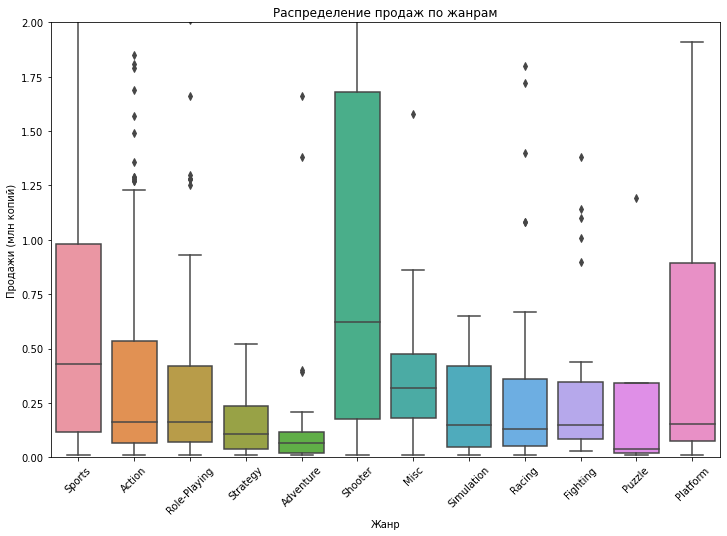

In [30]:
# Увеличиваем размер графика
plt.figure(figsize=(12, 8))

# Строим боксплот продаж по жанрам
sns.boxplot(x='genre', y='total_sales', data=filtered_df)

# Устанавливаем лимит для оси Y, чтобы убрать влияние больших выбросов
plt.ylim(0, 2)  # Пределы до 2 млн копий

# Добавляем заголовок и подписи к осям
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)

# Отображаем график
plt.show()

Данные боксплотов подтверждаются с выводами предыдущей диаграммы:
- Медианы жанров `"Shooter"`, `"Sports"`, `"Misc"` демонстрируют более высокие продажи по сравнению с другими жанрами. 
- Vенее низкие средние значения у `"Action"`, `"Role-playing"`, `"Platform"`, `"Stimulation"` и `"Fighting"`.
- Жанры "`Strategy"`, `"Adventure"` и `"Puzzle"` демонстрируют более низкие медианы продаж.
- Присутствует большой размах, это значит, что продажи игр в этом жанре распределены неравномерно, и существует значительная разница между играми, находящимися в нижней и верхней половине распределения.

<a id='Составление'></a>
## Составление портрета пользователя каждого региона:

Самые популярные платформы по регионам:

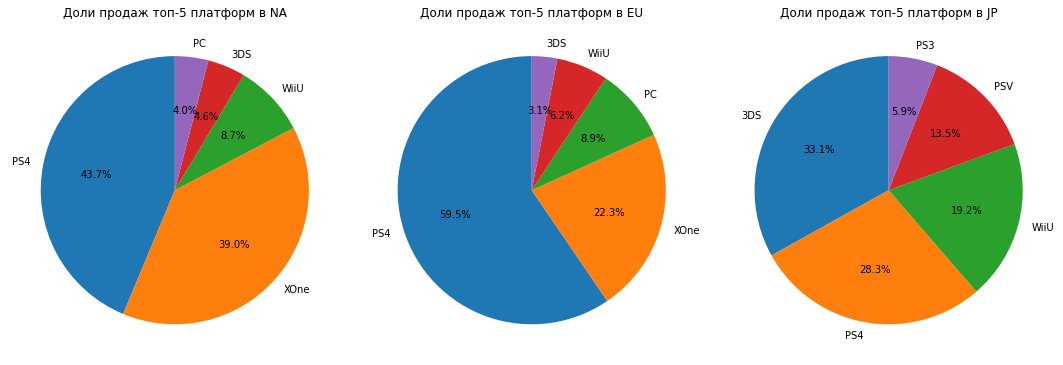

In [31]:
# Определение топ-5 платформ и их долей для каждого региона
platform_sales_share = {}
for region in ['NA', 'EU', 'JP']:
    top_platforms = filtered_df.groupby('platform')[f'{region.lower()}_sales'].sum().nlargest(5)
    total_sales = filtered_df[f'{region.lower()}_sales'].sum()
    shares = (top_platforms / total_sales) * 100  # Доля в процентах
    platform_sales_share[region] = shares

# Визуализация долей продаж с помощью круговой диаграммы
plt.figure(figsize=(15, 5))  # Размер фигуры для трех графиков

for i, (region, shares) in enumerate(platform_sales_share.items()):
    plt.subplot(1, 3, i + 1)  # Один ряд и три столбца
    shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Доли продаж топ-5 платформ в {region}')
    plt.ylabel('')  # Убираем ylabel для чистоты графика

plt.tight_layout()  # Убираем лишние отступы
plt.show()

**Сравнение регионов**

**Северная Америка (NA):**

- В Северной Америке наибольшую долю рынка занимают платформы PS4 (43,7%) и Xbox One (39%), что свидетельствует о сильной привязанности геймеров к этим консолям.
- Wii U также имеет свою популярность, но с меньшей долей рынка, составляющей 8,7%.
- PC и 3DS демонстрируют значительно меньшую долю, обе платформы имеют менее 5%.

**Европа (EU):**

- Европейский рынок выделяется выраженной привязанностью к платформе PS4, которая занимает 59,5% рынка.
- Xbox One занимает значительную долю в 22,3%.
- Замыкают пятёрку лидеров PC с 8,9%, Wii U с 6,2% и 3DS с около 3%.

**Япония (JP):**

- В Японии на первом месте находится 3DS с долей 33,1%.
- PlayStation 4 занимает второе место с 28,3%.
- Wii U (19,2%) и PlayStation Vita (13,5%) также пользуются популярностью, хотя их доля ниже.
- PlayStation 3 имеет значительно меньшую долю рынка — всего 5,9%.

**Самые популярные жанры по регионам:**

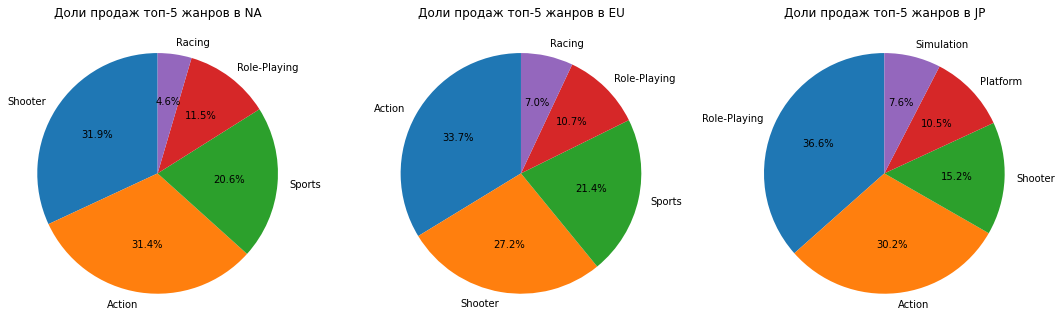

In [32]:
# Определение топ-5 жанров и их долей для каждого региона
genre_sales_share = {}
for region in ['NA', 'EU', 'JP']:
    top_genres = filtered_df.groupby('genre')[f'{region.lower()}_sales'].sum().nlargest(5)  # Топ-5 жанров
    total_sales = filtered_df[f'{region.lower()}_sales'].sum()  # Общие продажи в регионе
    shares = (top_genres / total_sales) * 100  # Доля в процентах
    genre_sales_share[region] = shares
    
# Визуализация долей продаж с помощью круговой диаграммы
plt.figure(figsize=(15, 5))  # Размер фигуры для трех графиков

for i, (region, shares) in enumerate(genre_sales_share.items()):
    plt.subplot(1, 3, i + 1)  # Один ряд и три столбца
    shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Доли продаж топ-5 жанров в {region}')
    plt.ylabel('')  # Убираем ylabel для чистоты графика

plt.tight_layout()  # Убираем лишние отступы
plt.show()

**Ключевые выводы:**

- Глобальная популярность экшена: Жанр Action занимает лидирующие позицию по продажам во всех трех регионах, демонстрируя универсальную привлекательность динамичных игр.

- Региональные особенности: Несмотря на общую тенденцию, в каждом регионе есть свои предпочтения:

 - Северная Америка (NA): Помимо экшена (31.4%), популярны шутеры (31.9%) и спортивные симуляторы (20.6%). Игры жанра Misc и Racing имеют значительно меншую долю рынка.
 - Европа (EU): В Европе также популярны экшен (33.7%),  шутеры (27.2%) спортивные симуляторы (21.4%). Доля игр  жанра Misc и Racing имеют значительно меншую долю рынка.
 - Япония (JP): Японский рынок демонстрирует наиболее ярко выраженную специфику. Здесь лидируют игры жанра Role-Playing (36.6%), что отражает традиционную любовь японских геймеров к ролевым играм. Экшен (30.2%) также популярен. Игры жанра Shooter (15.2%) немного популярнее, чем Platform и Simulation, которые тоже имеют значительно меньшую долю рынка.

**Влияние рейтинга ESRB на продажи:**

In [33]:
# Подсчет суммарных продаж по рейтингу ESRB для каждого региона
esrb_sales = filtered_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

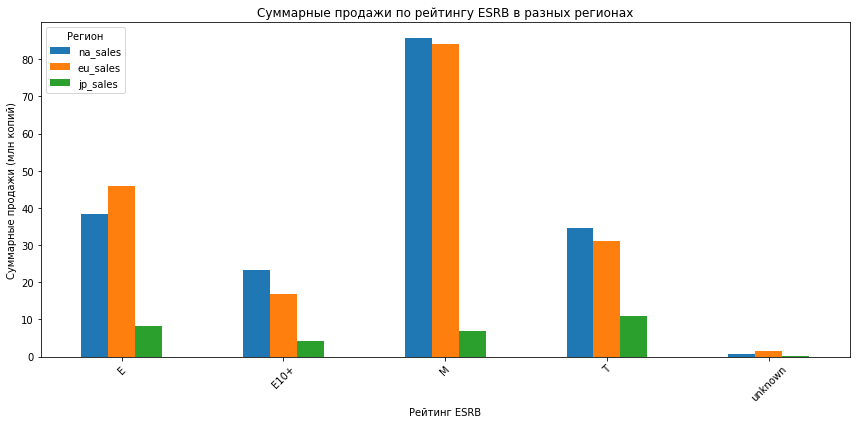

In [34]:
# Визуализация продаж по рейтингу ESRB
esrb_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Суммарные продажи по рейтингу ESRB в разных регионах')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.legend(title='Регион', loc='upper left')
plt.tight_layout()
plt.show()

**Общая картина:**

- Доминирование рейтинга "M" (Mature): В двух регионах (Северная Америка и Европа) игры с рейтингом "M" (для взрослых) демонстрируют наибольшие суммарные продажи. Это говорит о том, что игры с более взрослым контентом пользуются наибольшей популярностью у геймеров.
- Различия между регионами: Несмотря на общую тенденцию, наблюдаются существенные различия в предпочтениях геймеров в разных регионах:
 - Северная Америка: Здесь игры с рейтингом "M" имеют значительное преимущество над другими рейтингами.
 - Европа: В Европе также преобладают игры с рейтингом "M", но игры с рейтингом "E" чуть более поплярны, чем в Северной Америке.
 - Япония: В Японии игры с рейтингом "M" занимают третье место после T(подростки) и E (для всех).
- Низкая популярность рейтинга "E10+" (старше 10 лет и выше): Игры с этим рейтингом демонстрируют наименьшие продажи во всех регионах. Это может быть связано с тем, что данный рейтинг часто ассоциируется с более простыми и детскими играми.

**Детальный анализ по рейтингам:**
- Рейтинг "M" (Mature): Занимает первое место в Северной Америке и Европе, но его доля меньше в Японии, чем игр с рейтингом "T". Это свидетельствует о том, что существует значительная аудитория взрослых геймеров, предпочитающих игры с более зрелым контентом.
- Рейтинг "E": Занимает второе место во всех трех регионах. Игры с этим рейтингом часто представляют собой семейные развлечения, спортивные симуляторы и казуальные игры.
- Рейтинг "T": В Японии игры с рейтингом "T" занимают лидирующую позицию. Это объясняется популярностью японских RPG (Japanese Role-Playing Game), которые часто имеют этот рейтинг. В других регионах доля игр с рейтингом "T" также значительна и занимает третье место.
- Рейтинг "E10+": Занимает 4 место во всех трех регионах. 
- Рейтинг "unknown": Игры с этим рейтингом имеет значительно меньшую долю рынка, что говорит о его нишевом характере.



<a id='Проверка'></a>
## Проверка гипотез:

**Гипотеза о рейтингах платформ Xbox One и PC:**

- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

**Выбор порогового значения alpha**

Зададим уровень значимости α = 0.05, что является стандартной практикой в статистике. Это означает, что мы готовы принять риск ошибиться в 5% случаев.

**Критерий для проверки гипотез**

- Тест t: Это подходящий метод для сравнения средних значений двух групп. Поскольку мы сравниваем пользовательские рейтинги двух платформ и двух жанров, t-тест позволяет определить, есть ли статистически значимые различия между средними значениями.

- Проверка равенства дисперсий: Согласно рекомендациям, в Спринт 7/25 → Тема 7/9: Проверка гипотез → Урок 11/14 мы не будем проверять равенство дисперсий отдельно. Вместо этого, используем параметр equal_var=False в t-тесте, что учтет возможность неравенства дисперсий.

In [35]:
# Подготовка данных 
xbox_ratings = filtered_df[filtered_df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = filtered_df[filtered_df['platform'] == 'PC']['user_score'].dropna()

# t-тест для платформ
t_statistic_platforms, p_value_platforms = stats.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

# Вычисление средних значений
mean_xbox = xbox_ratings.mean()
mean_pc = pc_ratings.mean()

# Вывод статистики и средних значений на разных строках
output = (
    f"T-статистика: {t_statistic_platforms}\n"
    f"P-значение: {p_value_platforms}\n"
    f"Среднее Xbox One: {mean_xbox}\n"
    f"Среднее PC: {mean_pc}"
)
print(output)

# Проверка гипотезы для платформ
if p_value_platforms < 0.05:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC одинаковые.")


T-статистика: 1.4799068252288436
P-значение: 0.14037851868269774
Среднее Xbox One: 6.620529801324504
Среднее PC: 6.3417391304347825
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC одинаковые.


Поскольку p-value значительно ниже уровня значимости (0.05), мы отвергаем нулевую гипотезу. Это свидетельствует о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, что указывает на отсутствие статистически значимых различий между ними.

**Гипотеза о рейтингах жанров Action и Sports:**

- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [36]:
# Подготовка данных для жанров
action_ratings = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna()

# Вычисление средних значений
mean_action = action_ratings.mean()
mean_sports = sports_ratings.mean()

# t-тест для платформ
t_statistic_genres, p_value_genres = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Вывод статистики и средних значений на разных строках
output = (
    f"T-статистика: {t_statistic_genres}\n"
    f"P-значение: {p_value_genres}\n"
    f"Среднее Action: {mean_action}\n"
    f"Среднее Sports: {mean_sports}"
)
print(output)

# Проверка гипотезы для жанров
if p_value_genres < 0.05:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.")

T-статистика: 6.151884688583734
P-значение: 8.327612976032319e-09
Среднее Action: 6.83259911894273
Среднее Sports: 5.68433734939759
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


Поскольку p-value значительно ниже уровня значимости (0.05), мы отвергаем нулевую гипотезу. Это свидетельствует о том, что средние пользовательские рейтинги жанров Action и Sports различаются, что подтверждает различие между ними.

<a id='Общий'></a>
## Общий вывод по проекту:

Данное исследование направлено на анализ данных продаж видеоигр с целью выявления факторов, влияющих на их успешность. Был выбран период с 2014 по 2016 годы для анализа продаж видеоигр, поскольку он представляет собой оптимальный временной интервал, который позволяет избежать устаревших трендов и одновременно предоставляет достаточные данные для выявления актуальных факторов успешности в динамично меняющейся индустрии видеоигр. 

Проведенный анализ количества выпущенных игр по годам показал следующие ключевые тенденции:


- **Динамика выпуска игр:** В начале 1990-х годов количество новых игр было низким (менее 50 в год), однако с начала 2000-х годов наблюдается резкий рост, достигнув пика в 2007-2008 годах (около 600 игр в год). С 2010 года началось устойчивое снижение количества выпущенных игр, что говорит о зрелости рынка.


- **Продолжительность жизненного цикла:** Большинство платформ имеют жизненный цикл от 6 до 10 лет. Платформы PS2, PS3 и X360 имеют схожий период активности (9–10 лет), в то время как Wii и DS имеют более короткие циклы.


- **Лидеры по продажам по платформам:** 
 - *Выделяются 4 платформы* — PS2, X360, PS3 и Wii, которые демонстрируют наибольшие суммы продаж с 2000, но после своего жизненного цикла от 6 до 10 лет, они начинают терять свою актуадьность и продажи идут на спад или вовсе прекращаются для некоторых.
 - *В период с 2014 по 2016*: Несмотря на то, что пиковые продажи игр на PS4 и Xbox One были выше, средние продажи игр на Wii U оказались более высокими. Это свидетельствует о стабильном спросе на контент для этой платформы. 



- **Влияние оценок на продажи (2014-2016):** Анализ показал, что оценки критиков имеют более значительное влияние на продажи, чем отзывы пользователей. Это подчеркивает важность фокуса на качестве игр и их восприятии критиками.


- **Региональные предпочтения (2014-2016):** В Северной Америке и Европе доминирует платформа PS4, с 43,7% и 59,5% доли рынка соответственно, в то время как Xbox One также занимает значительную позицию, особенно в Северной Америке. В Японии же предпочтения геймеров смещены к 3DS, которая лидирует с долей 33,1%, в то время как PlayStation 4 занимает лишь второе место с 28,3%.


- **Лидеры продаж по жанрам (2014-2016):** Жанр Action занимает лидирующие позиции по продажам во всех трех регионах, подчеркивая его универсальную привлекательность среди геймеров. Однако каждый регион демонстрирует свои уникальные предпочтения: в Северной Америке и Европе Action сочетается с Shooter и Sports Simulation, тогда как в Японии наиболее популярны Role-Playing игры, что отражает традиционные интересы японских игроков.



- **Влияние рейтинга ESRB (2014-2016):** Игры с рейтингом "M" (Mature) демонстрируют наибольшие суммарные продажи в Северной Америке (46,2%) и Европе (47,3%), что указывает на популярность контента для взрослых среди геймеров. В то же время Япония предпочитает игры с рейтингом "T" (36,4%) и "E" (27,1%), что свидетельствует о региональных различиях в предпочтениях, где рейтинг "E10+" показывает наименьшие продажи во всех регионах (менее 5%), вероятно, из-за ассоциации с более простыми играми.



- **Статистические гипотезы (2014-2016):** Проведенные t-тесты подтвердили схожесть в пользовательских рейтингах между платформами Xbox One и PC. Однако гипотеза о равенстве пользовательских рейтингов жанров Action и Sports не подтвердилась.

<a id='Рекомендации'></a>
## Рекомендации для бизнеса:

На основе проведенного анализа данных о продажах видеоигр, оценках пользователей и критиков, а также жанрах и платформах, можно выделить несколько ключевых рекомендаций для интернет-магазина «Стримчик», направленных на прогнозирование успешности игр и эффективное планирование рекламных кампаний в 2017 году.

- **Фокус на платформы с высокой популярностью:** Учитывая, что платформа PS4 занимает доминирующую позицию в Северной Америке (43,7%) и Европе (59,5%), стоит сосредоточить маркетинговые усилия на играх, выпущенных для этой платформы. Однако в Японии предпочтения геймеров смещены к 3DS, которая занимает 33,1% доли рынка, что говорит о необходимости включения игр для этой платформы в ассортимент. Также необходимо учитывать, что несмотря на высокие пиковые продажи PS4 и Xbox One, Wii U продемонстрировала стабильный спрос, что может указывать на уникальную целевую аудиторию, заинтересованную в играх для данной платформы.


- **Ориентация на жанры с высоким спросом:** Жанр Action показал высокие продажи во всех регионах, что подчеркивает его универсальную привлекательность. Рекомендуется сосредоточиться на продвижении игр в этом жанре, одновременно учитывая региональные предпочтения: в Северной Америке и Европе можно рассмотреть комбинации с жанрами Shooter и Sports Simulation, в то время как в Японии стоит акцентировать внимание на Role-Playing играх.


- **Учет влияния оценок на продажи:** : Анализ показал, что оценки критиков имеют более значительное влияние на продажи, чем отзывы пользователей. Рекомендуется активно работать с рецензентами и критиками для повышения видимости игр, что может существенно повысить их продажи.


- **Адаптация к региональным предпочтениям:** ажно учитывать различия в предпочтениях игроков в разных регионах. В Северной Америке и Европе игры с рейтингом "M" (Mature) демонстрируют высокие продажи (46,2% и 47,3% соответственно), в то время как в Японии более популярны игры с рейтингами "T" (36,4%) и "E" (27,1%). Необходимо адаптировать контент и маркетинговые стратегии с учетом этих различий для каждой аудитории.


- **Углубленный анализ временных трендов:** Т Поскольку рынок видеоигр постоянно меняется, важно регулярно пересматривать стратегии на основе последних данных и трендов. Это позволит интернет-магазину «Стримчик» оставаться конкурентоспособным и предлагать актуальные продукты.